# A Jupyter Notebook that Generates a Portfolio Overview

Felcia Schlieder

# Contents

[Introduction](#introduction)

[Data in Finance](#data-in-finance)

[Modelling the Portfolio](#modelling-the-portfolio)

[Handling Tabular Data](#handling-tabular-data)

[Manual Currency Conversion](#manual-currency-conversion)

[Retrieving Stock Prices](#retrieving-stock-prices)

[Plotting a Pie Chart of the Portfolio](#plotting-a-pie-chart-of-the-portfolio)

[Retrieving Currency Exchange Rates](#retrieving-currency-exchange-rates)

[Full Solution](#full-solution)

# Introduction

Anyone who has a portfolio of shares will want to track their performance.  If you buy shares through an online broker, you will probably manage your portfolio through them. The web interface of your account will show you the current share prices, convert currencies if necessary and display the total value of the portfolio. 

The situation is different if you are working with a virtual portfolio (no money, just numbers), such as a Student Managed Investment Fund (SMIF) set up for educational purposes. One option is to research the price data from financial news providers such as Yahoo! Finance or Google Finance and manage it manually in a spreadsheet. This is how we proceed at the [SMIF at the University of Stirling](https://www.linkedin.com/company/stirling-university-smif). The disadvantages of a spreadsheet solution are obvious: it is tedious to find prices, and there can be errors in the transfer process.

The idea of this software project is to avoid manual intervention and to create the portfolio overview automatically by retrieving share prices and exchange rates from the web. It is programmed in Python, probably the most widely used language in the field of data science. The portfolio management functions are available in this Jupyter Notebook.

The basic functionality is quite simple. The SMIF portfolio manager describes and updates the composition of the portfolio in a code cell. When the code is executed, it determines (1) the current prices based on data from Yahoo! Finance, (2) the current exchange rates based on data from the European Central Bank, (3) the value and relative weight of each stock in the portfolio, (4) the total value of the portfolio. These outputs are provided in tabular form. In addition, (5) the relative weight of each stock is shown in a pie chart.

I am aware that it would be easier for the SMIF to set up a user account with one of the finance news providers, as they offer the possibility to create portfolio overviews. However, all the data would then be tied to a personal account and the composition of the portfolio would be shared with third parties. To be honest, my motivation for starting this project was not data privacy (remember: the portfolio does not contain money, just numbers). I wanted to learn more about Python, saw our portfolio spreadsheet and started thinking about how I could automate the web research parts.

>**TLTR?** Too long to read? A tip for the SMIF portfolio manager in a hurry: If you just want to use the functionality but not understand it, read the section [Modelling the Portfolio](#Modelling-the-Portfolio) and then jump to the [Full solution](#Full-Solution) code cell. If necessary, modify the portfolio data in the cell as described in the portfolio modelling section and execute the code. That's all!

>**PYTHON** If you want to understand the code as well as use it, you need some basic knowledge of Python. This Jupyter Notebook is not a substitute for a Python course. I myself acquired my first skills in an online course and then extended them by trial and error. In fact, I started this project to practise and expand my skills. Note that this code was written by a beginner with no previous programming experience. Please let me know if you find any bugs and send me any suggestions that might lead to more 'Pythonistic' code.

>**LICENSE** The code in this Jupyter notebook is made available under the [MIT license](https://opensource.org/license/mit). In particular, this means that you may reuse the code in your projects under the conditions specified in the license and that *"the software is provided 'as is' without warranty of any kind"*. 

# Data in Finance

Data quality comes at a price. Note that the price is not always monetised in the business models of the web. We can also pay with our privacy by providing personal data, or with attention by accepting advertising. This is impractical when the software is being used by an organisation such as a SMIF because non-monetary payment models are linked to a specific person who has to set up an account. When the portfolio manager role changes, the portfolio data must be transferred from one private account to another, an operation that typically has to be done manually.

The following requirements for financial data are aligned with the needs of a SMIF focused on long-term growth opportunities and with the data scientists' preference for software development in Python. 

**Reliable** The data comes from a reliable data provider. If the provider uses external sources, these should be referenced.

**Up to date** Updates occur on at least a daily basis and with known characteristics, such as daily closing share prices.

**Licensed** The data provider permits the use of the data for the management of the portfolio.

**Free of charge** Access is free of charge and does not require setting up a user account.

**API** The data can be retrieved through an Application Program Interface (API), for which a Python library exists.

For lack of a better term, I refer to RULFA data when all five requirements are met. For example, the data portal of the [European Central Bank (ECB)](https://data.ecb.europa.eu/) provides RULFA data. The ECB is the authoritative provider of the euro reference rates. These exchange rates against the euro are updated every working day at around 16:00 CET. The [terms of use](https://www.ecb.europa.eu/services/using-our-site/disclaimer/html/index.en.html) permit the use of the data on condition that the ECB is acknowledged as the source. The data is provided free of charge and can be accessed without a user account.

The ECB provides data using the communication protocol that browsers use to access websites. This standard interface technology is known as a REST API. On the user side, code must be written to communicate with the [ECB Data Portal REST API](https://data.ecb.europa.eu/help/api/overview). Writing the code is greatly simplified if there is a library that provides the required functions directly in Python or any other programming language used in the project. An appropriate Python library is [pandasSDMX](https://pandasdmx.readthedocs.io/en/v1.0/), which was created  by open source developers. The library also has the advantage that it can be used to access any REST APIs that publish data in SMDX format, including those of the United Nations, UNICEF, OECD and ILO.

Unfortunately, RULFA data is rare outside of public sector data providers. This seems to contradict the everyday experience that a share price or exchange rate is just a click away on the web. Not quite. It is true, for example, that the financial news provider [Yahoo Finance](https://finance.yahoo.com/) publishes share prices on the web, which can be accessed free of charge without setting up an account. The data originates from reliable sources and also fulfils the up-to-dateness requirement. However, this data is intended for people navigating the web, not for algorithms that need to retrieve the data via an API. 

Interestingly, with [yfinance](https://pypi.org/project/yfinance/), there exists a Python library that enables easy access to Yahoo Finance data. However, there is no REST API on the other side. The library accesses the website like a human user and tries to extract the data from its content. This procedure is called web scraping. Web scraping should never be the basis of commercial software. It can fail if the provider changes the structure of the website. Users also run the risk that the data provider will deny them access if they make too many requests. However, this will not be the case if the rates for a SMIF portfolio are queried once a day.

The *yfinance* library is frequently used by finance students in projects, for example to try out machine learning methods, and has apparently also found its way into at least one [university course](https://zoo.cs.yale.edu/classes/cs458/lectures/yfinance.html). However, this is not RULFA data in the sense described above. The L for licence is missing and the A for API is also not fully present. It could be described as RUF (pronounce: rough) data.

>**PYTHON** The code of this project uses the packages *yfinance* and *pandasSDMX*. As the name of the latter suggests, it is based on the  [pandas](https://pandas.pydata.org/) package that is widely used in data science. *Pandas* is a package for analysing data that is available in the form of tables. The first step is therefore to import all three packages.

In [ ]:
import yfinance as yf
import pandas as pd
import pandasdmx as sdmx

# Modelling the Portfolio

A portfolio consists of investments in shares. Each stock is described by a list of (1) the ticker symbol, (2) the company name, (3) the number of shares the portfolio holds in that stock, and (4) the currency the shares are traded in. 
```python
['DIS', 'Disney', 7, 'USD']
```
This information comes from the portfolio manager, who is also responsible for providing updates as shares are bought and sold. The portfolio is represented by a list of lists. At the moment, data updates have to be done in the code below that assigns the ```portfolio``` variable. 

In [2]:
# Information provided and updated by the portfolio manager
portfolio = [
             ['BAX', 'Baxter', 17, 'USD'],
             ['BLK', 'BlackRock', 2, 'USD'],
             ['CRM', 'Salesforce', 6, 'USD'],
             ['COLD', 'Americold', 9, 'USD'],
             ['DIS', 'Disney', 7, 'USD'], 
             ['EL', 'Estee Lauder', 3, 'USD'],
             ['EZJ.L', 'EasyJet', 75, 'GBp'], 
             ['GAW.L', 'Games Workshop', 6, 'GBp'],
             ['GRT-UN.TO', 'Granite', 12, 'CAD'],
             ['IFX.DE', 'Infineon', 30, 'EUR'], 
             ['LLOY.L', 'Lloyds', 1556, 'GBp'], 
             ['MELI', 'MercadoLibre', 1, 'USD'],
             ['NEE', 'NextEra', 20, 'USD'], 
             ['PFE','Pfizer', 22, 'USD'], 
             ['SQ', 'Block', 2, 'USD'],
             ['TTE.PA', 'TotalEnergies', 11, 'EUR']
             ]

The data in the `portfolio` seems redundant. With the ticker symbol you should be able to determine the company name. However, this only applies if you also know the stock exchange. The usual way to uniquely identify a security is by its *International Securities Identification Number* (ISIN). A security identified by its ISIN may be traded on more than one stock exchange, though. The *Market Identifier Code* (MIC) uniquely identifies a securities trading exchange. 

Unfortunately there does not seem to be a RUFLA (reliable, ..., free, ..., API) data service that returns company information, including the ticker, using ISIN and MIC. For this reason, we will model the portfolio as described with the company names chosen by the portfolio manager and the ticker symbols from Yahoo.

>**TICKER SYMBOLS** On Yahoo Finance, the ticker symbols for stock exchanges other than the NYSE and NASDAQ have to be written with an extension. The LSE, for instance, has the extension ```.L```, the Canadian Securities Exchange in Toronto has ```.TO```, the Euronext in Paris has ```.PA``` and the Boerse Frankfurt has ```.DE```. These extensions are specific to Yahoo Finance and appear also in the URI of the quotation webpages, e.g. https://finance.yahoo.com/quote/EZJ.L/ for EasyJet traded at the LSE.

>**TICKER MODIFIERS** Be careful not to confuse Yahoo Finance's proprietary stock exchange extensions with the *ticker symbol modifiers* that stock exchanges use to describe share voting classes or trading status. On the NYSE, for example, Birkshire Hathaway Inc. trades two classes of shares, Class A with the ticker symbol `BRK.A` and Class B with limited voting rights and the ticker symbol `BRK.B`. Yahoo Finance uses `BRK-A`and `BRK-B`. If you are unsure, type the ticker symbol into the search box at https://finance.yahoo.com and check that it returns the stock you had in mind before adding it to the portfolio list.

# Handling Tabular Data

All the necessary information is stored in the `portfolio` variable. However, it is rather tedious to display and modify a list of list. Representing the portfolio as a Pandas *DataFrame*, simplifies these operations. We create a *DataFrame* with the constructor `pd.DataFrame()` that takes the list of lists `portfolio` as the first argument and the list `portfolio_col` with the column headings as the second argument. Note that the import statement has introduced `pd` as a shorthand notation for the Pandas package.

In [3]:
# Create the portfolio dataframe
portfolio_col = ['Symbol', 'Name', 'Shares', 'Currency']
portfolio_df = pd.DataFrame(portfolio, columns=portfolio_col)

# Print the information provided by the portfolio manager
portfolio_df

,Symbol,Name,Shares,Currency
0,BAX,Baxter,17,USD
1,BLK,BlackRock,2,USD
2,CRM,Salesforce,6,USD
3,COLD,Americold,9,USD
4,DIS,Disney,7,USD
5,EL,Estee Lauder,3,USD
6,EZJ.L,EasyJet,75,GBp
7,GAW.L,Games Workshop,6,GBp
8,GRT-UN.TO,Granite,12,CAD
9,IFX.DE,Infineon,30,EUR


# Manual Currency Conversion

As the portfolio contains assets traded in different currencies, we need to convert these currencies into the base currency, which we assume to be GBP. In this simple version of the converter, the current exchange rates are hard-coded in a *Dictionary*. They have to be set by the portfolio manager. We will later describe a more sophisticated method that uses an API to retrieve the current rates from a provider.

> **PYTHON** Stock on the LSE are quoted in pence (GBp). The *conversion_rate* method defined below will also convert GBp to GBP by using a 'rate' of 0.010. When updating the portfolio list, care must be taken not to confuse GBp and GBP.

In [4]:
def conversion_rate(currency):
# Returns the current conversion rate from the currency to GBP. The data is from 5 Jun 2024.
    rates = {"USD": 0.783, "EUR": 0.852, "CAD":  0.572, "GBp": 0.010}
    return rates[currency]

# Retrieving Stock Prices

Information on the share prices of listed companies can be retrieved directly from the Yahoo Finance website using the *yfinance* package. The package handles the communication with the website, so there must be an internet connection when the code is executed.

If the prices found are not quoted in GBP, they will be converted using the exchange rates (currently still manually determined). The weight of each share is then determined as a proportion of the value of the portfolio.

> **PYTHON** To obtain information about a stock from Yahoo Finance, we first need to create a *Ticker* object for the stock. The *yfinance* package creates a *Ticker* given the ticker symbol as argument. For instance, the expression `yf.Ticker('GRT-UN.TO')` creates a *Ticker* object for the Granite Real Estate Investment Trust traded in Toronto. Remember that the import statement has introduced *yf* as a shorthand for the *yfinance* package.

 > **PYTHON** The function `price()` defined below does the following: It creates a *Ticker* object using the ticker symbol, queries the price history for the last day available (`"1d"`) and selects the closing price (`'Close'`) from it. The selector expression `.iloc[0]` chooses the correct data field. Finally, the price is rounded to two decimal places (`round(...,2)`).

In [6]:
def price(symbol):
# Retrieves the stock's closing price from Yahoo Finance. 
    return round(yf.Ticker(symbol).history(period="1d")['Close'].iloc[0],2)

> **PYTHON** We want to apply the `price()` function to each stock in the portfolio. The *pandas* package makes this very easy. You just have to describe how to calculate the values of one column from the values of another column. However, you do not need to specify how to iterate through the column values themselves (e.g. using a `for` loop). It is easy to understand how this works by looking at an example. The command in line 2 is an assignment statement. Its left-hand side creates a new column with the label `'Price'` in the `portfolio_df` dataframe. The right-hand side specifies how the values to be assigned are computed. They are obtained by looking up the value in the `'Symbol'` column and applying the function `price()`. The Pandas package provides the `apply()` method for this purpose.

In [7]:
# Add two columns showing the price of each stock in the original currency and GBP
portfolio_df['Price'] = portfolio_df['Symbol'].apply(price)
portfolio_df['GBP_Price'] = round(portfolio_df['Price'] * portfolio_df['Currency'].apply(conversion_rate), 2)

# Add a column showing the value of each stock
portfolio_df['GBP_Value'] = portfolio_df['Shares'] * portfolio_df['GBP_Price']

# Add a column showing the weight of each stock in the portfolio
total = portfolio_df['GBP_Value'].sum()
portfolio_df['Weight'] = round(100 * portfolio_df['GBP_Value'] / total, 1)

# Print portfolio overview without GBP_Price column
display_col = list(portfolio_df.columns.values)
display_col.remove('GBP_Price')
portfolio_df[display_col]

,Symbol,Name,Shares,Currency,Price,GBP_Value,Weight
0,BAX,Baxter,17,USD,36.32,483.48,4.2
1,BLK,BlackRock,2,USD,949.19,1486.44,12.9
2,CRM,Salesforce,6,USD,287.75,1351.86,11.7
3,COLD,Americold,9,USD,27.58,194.40,1.7
4,DIS,Disney,7,USD,95.15,521.50,4.5
5,EL,Estee Lauder,3,USD,95.86,225.18,1.9
6,EZJ.L,EasyJet,75,GBp,491.03,368.25,3.2
7,GAW.L,Games Workshop,6,GBp,11040.00,662.40,5.7
8,GRT-UN.TO,Granite,12,CAD,80.01,549.24,4.7
9,IFX.DE,Infineon,30,EUR,30.05,768.00,6.6


# Plotting a Pie Chart of the Portfolio

One of the most popular Python libraries for creating 2D graphics is *matplotlib*. We also need *numpy*, a package for numerical computations.  

([<matplotlib.patches.Wedge at 0x2c993223150>,
 [Text(-1.2495003846058326, -0.035338206942014894, 'SQ'),
  Text(-1.2424511942547616, -0.1371678894454398, 'COLD'),
  Text(-1.2190332869852538, -0.27651011775688766, 'EL'),
  Text(-1.159306439655103, -0.4674490121651873, 'EZJ.L'),
  Text(-1.020424058124045, -0.721965886729876, 'BAX'),
  Text(-0.7937502520216997, -0.9656399626234866, 'PFE'),
  Text(-0.5000363982708489, -1.1456280375428654, 'DIS'),
  Text(-0.15276972402204927, -1.2406294416231733, 'GRT-UN.TO'),
  Text(0.23036807646186067, -1.2285888447105737, 'TTE.PA'),
  Text(0.6261332797763277, -1.0818766639301076, 'GAW.L'),
  Text(0.9876937543513655, -0.7661338313997785, 'IFX.DE'),
  Text(1.224028512209227, -0.2534841243527224, 'LLOY.L'),
  Text(1.1502898170397893, 0.4892170651301609, 'NEE'),
  Text(0.535774778675585, 1.1293561823158929, 'CRM'),
  Text(-0.40489669136581663, 1.1826067263976705, 'BLK'),
  Text(-1.1424635691994425, 0.507224795383734, 'MELI')],
 [Text(-1.0995603384531327, -0.

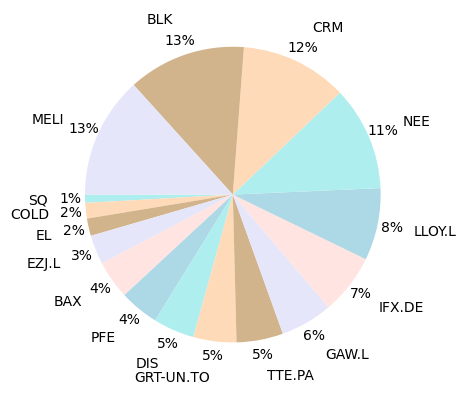

In [8]:
import matplotlib.pyplot as plt
import numpy as np

pie_colors = ['PaleTurquoise', 'PeachPuff', 'Tan', 'Lavender', 'MistyRose', 'LightBlue']

# Sort a copy of the portfolio DataFrame by stock weight
pie_df = portfolio_df.copy(deep=True)
pie_df.sort_values(by='Weight', inplace=True)

# Extract ticker symbols and weights from the sorted portfolio
portfolio_stocks = pd.Series.to_numpy(pie_df['Weight'])
portfolio_labels = pd.Series.to_list(pie_df['Symbol'])

# Plot the pie chart
plt.pie(pd.Series(portfolio_stocks), colors=pie_colors, startangle=180, 
        labels=portfolio_labels, labeldistance=1.25, autopct='%.0f%%', pctdistance=1.1)

# Retrieving Currency Exchange Rates

Current exchange rates for currencies are needed in many places. Nevertheless, it is surprisingly difficult to find suitable data sources.Here we describe a solution based on data from the European Central Bank, which is RUFL data according to our criteria. The ECB offers the exchange rates via an API that returns data in the SMDX format, which can be accessed using the [pandasSDMX](https://pandasdmx.readthedocs.io/en/v1.0/) package. 

In [12]:
import pandasdmx as sdmx
import datetime

# Exchange rates for EUR into currencies
currencies = ['GBP', 'JPY', 'USD', 'CAD']

# Create Request object for connecting to the ECB data service
ecb = sdmx.Request('ECB')

# Selection keys: retrieve the daily reference rates for EUR as denominator currency
# D = daily, SP00 = reference rate, A = average or standardized measure
frequency = 'D' 
key = dict(FREQ=frequency, CURRENCY=currencies, CURRENCY_DENOM='EUR', EXR_TYPE='SP00', EXR_SUFFIX='A')

# Parameters: retrieve the most recent rate only
params = dict(lastNObservations=1)

# Retrieve data, convert to pandas series, select data
sr = ecb.data('EXR', key=key, params=params).to_pandas().loc[frequency]

# Extract the exchange rates and add them to the eur_rates dictionary
eur_rates = dict([[c, sr.loc[c].values[0]] for c in currencies])

# Add the rate for GBp to the rates dictionary
eur_rates['GBp'] = round(100 * eur_rates['GBP'], 5)

# Extract the date of the rates, reformat date string and add it with 'date' key to the rate dictionary
rates_date = sr.reset_index()['TIME_PERIOD'][0]
rates_date_f = datetime.datetime.strptime(rates_date, '%Y-%m-%d').strftime('%d %b %Y')
eur_rates['date'] = rates_date_f

print('EUR rates', eur_rates)

def gbp_rates(eur_rates):

    # For the list of foreign currencies, ignore the 'GDP', 'GDp' and 'date' keys 
    foreign_currencies = [k for k in eur_rates.keys() if k not in ['GBP', 'GBp', 'date']]

    # Convert the foreign currencies to EUR and the EUR amount to GBP
    gbp_rates = dict([(c, round(eur_rates['GBP'] / eur_rates[c], 6)) for c in foreign_currencies])

    # Add the entries for the keys 'EUR' and 'GBp' to the dictionary
    gbp_rates['EUR'] = round(eur_rates['GBP'], 6)
    gbp_rates['GBp'] = 0.0100
    gbp_rates['date'] = eur_rates['date']
    return gbp_rates

print('GBP rates', gbp_rates(eur_rates))


2024-10-07 12:28:33,147 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message


EUR rates {'GBP': 0.83735, 'JPY': 161.69, 'USD': 1.1029, 'CAD': 1.4952, 'GBp': 83.735, 'date': '04 Oct 2024'}
GBP rates {'JPY': 0.005179, 'USD': 0.759226, 'CAD': 0.560025, 'EUR': 0.83735, 'GBp': 0.01, 'date': '04 Oct 2024'}


# Full Solution

This combines the code for retrieving the stock quotations from Yahoo Finance with the code that computes the exchange rates from the EUR rates published by the ECB.


Information provided by the portfolio manager. Please, check!

       Symbol            Name  Shares Currency
0         BAX          Baxter      17      USD
1         BLK       BlackRock       2      USD
2         CRM      Salesforce       6      USD
3        COLD       Americold       9      USD
4         DIS          Disney       7      USD
5          EL    Estee Lauder       3      USD
6       EZJ.L         EasyJet      75      GBp
7       GAW.L  Games Workshop       6      GBp
8   GRT-UN.TO         Granite      12      CAD
9      IFX.DE        Infineon      30      EUR
10     LLOY.L          Lloyds    1556      GBp
11       MELI    MercadoLibre       1      USD
12        NEE         NextEra      20      USD
13        PFE          Pfizer      22      USD
14         SQ           Block       2      USD
15     TTE.PA   TotalEnergies      11      EUR


2024-10-07 12:29:09,076 pandasdmx.reader.sdmxml - INFO: Use supplied dsd=… argument for non–structure-specific message



Currency conversion into GBP is based on the daily EUR rates from the ECB. Check against other sources!
CAD        0.560025
USD        0.759226
EUR         0.83735
GBp            0.01
date    04 Oct 2024
dtype: object 

       Symbol            Name  Shares Currency     Price  GBP_Value  Weight
0         BAX          Baxter      17      USD     36.32     468.86     4.2
1         BLK       BlackRock       2      USD    949.19    1441.30    12.8
2         CRM      Salesforce       6      USD    287.75    1310.82    11.6
3        COLD       Americold       9      USD     27.58     188.46     1.7
4         DIS          Disney       7      USD     95.15     505.68     4.5
5          EL    Estee Lauder       3      USD     95.86     218.34     1.9
6       EZJ.L         EasyJet      75      GBp    491.10     368.25     3.3
7       GAW.L  Games Workshop       6      GBp  11020.00     661.20     5.9
8   GRT-UN.TO         Granite      12      CAD     80.01     537.72     4.8
9      IFX.DE      

([<matplotlib.patches.Wedge at 0x2c9958798d0>,
 [Text(-1.2495033686322357, -0.0352325386070255, 'SQ'),
  Text(-1.2424962390468979, -0.13675926277336375, 'COLD'),
  Text(-1.2192174924026413, -0.275696764978146, 'EL'),
  Text(-1.1583758941600595, -0.4697502398390899, 'EZJ.L'),
  Text(-1.0172210970499427, -0.7264717748932241, 'BAX'),
  Text(-0.7932753354387101, -0.9660301455879117, 'PFE'),
  Text(-0.5040057312942624, -1.1438873296013625, 'DIS'),
  Text(-0.15425798006107877, -1.2404452731126334, 'GRT-UN.TO'),
  Text(0.2354571575883156, -1.2276236910961074, 'TTE.PA'),
  Text(0.6396349612810314, -1.0739493080713882, 'GAW.L'),
  Text(1.0033894941802828, -0.7454592698254119, 'IFX.DE'),
  Text(1.230820353949811, -0.21813128226566214, 'LLOY.L'),
  Text(1.1350355417429694, 0.523635673899558, 'NEE'),
  Text(0.511161632538989, 1.1407075810303338, 'CRM'),
  Text(-0.42036331060621535, 1.177197811370792, 'BLK'),
  Text(-1.1446752060942855, 0.502213771767566, 'MELI')],
 [Text(-1.0995629643963674, -0.03

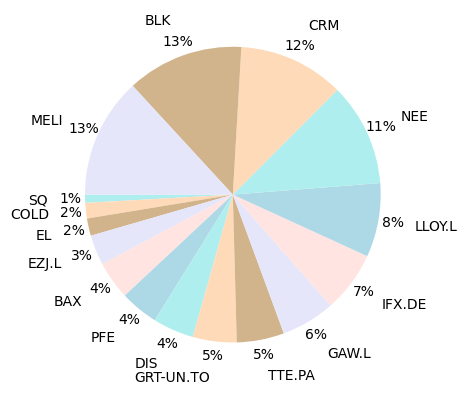

In [13]:
import yfinance as yf
import pandas as pd

########################################################################################
### Information about the portfolio
########################################################################################

# This information is provided and updated by the portfolio manager. Please, check!
portfolio_col = ['Symbol', 'Name', 'Shares', 'Currency']
portfolio = [
             ['BAX', 'Baxter', 17, 'USD'],
             ['BLK', 'BlackRock', 2, 'USD'],
             ['CRM', 'Salesforce', 6, 'USD'],
             ['COLD', 'Americold', 9, 'USD'],
             ['DIS', 'Disney', 7, 'USD'], 
             ['EL', 'Estee Lauder', 3, 'USD'],
             ['EZJ.L', 'EasyJet', 75, 'GBp'], 
             ['GAW.L', 'Games Workshop', 6, 'GBp'],
             ['GRT-UN.TO', 'Granite', 12, 'CAD'],
             ['IFX.DE', 'Infineon', 30, 'EUR'], 
             ['LLOY.L', 'Lloyds', 1556, 'GBp'], 
             ['MELI', 'MercadoLibre', 1, 'USD'],
             ['NEE', 'NextEra', 20, 'USD'], 
             ['PFE','Pfizer', 22, 'USD'], 
             ['SQ', 'Block', 2, 'USD'],
             ['TTE.PA', 'TotalEnergies', 11, 'EUR']
             ]

# Create the portfolio dataframe
portfolio_df = pd.DataFrame(portfolio, columns=portfolio_col)

# Print the information provided by the portfolio manager
print('\nInformation provided by the portfolio manager. Please, check!\n')
print(portfolio_df)


########################################################################################
### Compute currency conversions using the EUR exchange rates published by the ECB
########################################################################################

import pandasdmx as sdmx
import datetime

# Determine the non-EUR currencies: from the portfolio currencies remove EUR and replace GBp by GBP
currencies = set(portfolio_df['Currency'])
currencies.difference_update({'EUR', 'GBp'})
currencies.update({'GBP'})

# Create Request object for connecting to the ECB data service
ecb = sdmx.Request('ECB')

# Selection keys: retrieve the daily reference rates for EUR as denominator currency
# D = daily, SP00 = reference rate, A = average or standardized measure
frequency = 'D' 
key = dict(FREQ=frequency, CURRENCY=currencies, CURRENCY_DENOM='EUR', EXR_TYPE='SP00', EXR_SUFFIX='A')

# Parameters: retrieve the most recent rate only
params = dict(lastNObservations=1)

# Retrieve data, convert to pandas series, select data
sr = ecb.data('EXR', key=key, params=params).to_pandas().loc[frequency]

# Extract the exchange rates and add them to the eur_rates dictionary
eur_rates = dict([[c, sr.loc[c].values[0]] for c in currencies])

# Add the rate for GBp to the rates dictionary
eur_rates['GBp'] = round(100 * eur_rates['GBP'], 5)

# Extract the date of the rates, reformat date string and add it with 'date' key to the rate dictionary
rates_date = sr.reset_index()['TIME_PERIOD'][0]
rates_date_f = datetime.datetime.strptime(rates_date, '%Y-%m-%d').strftime('%d %b %Y')
eur_rates['date'] = rates_date_f

def gbp_rates(eur_rates):

    # Determine list of foreign currencies: ignore the 'GDP', 'GDp' and 'date' keys 
    foreign_currencies = [k for k in eur_rates.keys() if k not in ['GBP', 'GBp', 'date']]

    # Convert the foreign currencies to EUR and the EUR amount to GBP
    gbp_rates = dict([(c, round(eur_rates['GBP'] / eur_rates[c], 6)) for c in foreign_currencies])

    # Add the entries for the keys 'EUR' and 'GBp' to the dictionary
    gbp_rates['EUR'] = round(eur_rates['GBP'], 6)
    gbp_rates['GBp'] = 0.010
    gbp_rates['date'] = eur_rates['date']
    return gbp_rates

# Compute the exchange rates to GBP from the EUR exchange rates publised by the ECB
rates = gbp_rates(eur_rates)

# Print the exchange rates computed from the EUR exchange rates
print('\nCurrency conversion into GBP is based on the daily EUR rates from the ECB. Check against other sources!')
# rates_df = pd.Series(rates)
print(pd.Series(rates), '\n')

def conversion_rate(currency):
# Returns the current conversion rate from the currency to GBP. The data is from 5 Jun 2024.
    return rates[currency]


########################################################################################
### Compute the portfolio's value using the stock quotations from Yahoo Finance
########################################################################################

def price(symbol):
# Retrieves the stock's closing price from Yahoo Finance. 
    return round(yf.Ticker(symbol).history(period="1d")['Close'].iloc[0],2)

# Add two columns showing the price of each stock in the original currency and GBP
portfolio_df['Price'] = portfolio_df['Symbol'].apply(price)
portfolio_df['GBP_Price'] = round(portfolio_df['Price'] * portfolio_df['Currency'].apply(conversion_rate), 2)

# Add a column showing the value of each stock
portfolio_df['GBP_Value'] = portfolio_df['Shares'] * portfolio_df['GBP_Price']

# Add a column showing the weight of each stock in the portfolio
total = portfolio_df['GBP_Value'].sum()
portfolio_df['Weight'] = round(100 * portfolio_df['GBP_Value'] / total, 1)

# Print portfolio overview without GBP_Price column
display_col = list(portfolio_df.columns.values)
display_col.remove('GBP_Price')
print(portfolio_df[display_col])


########################################################################################
### Draw a pie diagram of the portfolio
########################################################################################

import matplotlib.pyplot as plt
import numpy as np

pie_colors = ['PaleTurquoise', 'PeachPuff', 'Tan', 'Lavender', 'MistyRose', 'LightBlue']

# Sort a copy of the portfolio DataFrame by stock weight
pie_df = portfolio_df.copy(deep=True)
pie_df.sort_values(by='Weight', inplace=True)

# Extract ticker symbols and weights from the sorted portfolio
portfolio_stocks = pd.Series.to_numpy(pie_df['Weight'])
portfolio_labels = pd.Series.to_list(pie_df['Symbol'])

# Plot the pie chart
plt.pie(pd.Series(portfolio_stocks), colors=pie_colors, startangle=180, 
        labels=portfolio_labels, labeldistance=1.25, autopct='%.0f%%', pctdistance=1.1)
